In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

import matplotlib
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        # Lines
        'lines.linewidth': 1,
        'lines.markersize': 4.0,
        'figure.titlesize': 'large',
    
}
matplotlib.rcParams.update(nice_fonts)

In [42]:
L=8
data = np.atleast_2d(np.load("averaged-hJ-L-%d-h-%.1f-U-%.1f-J-%.1f.npy"%(8,1,3,4), allow_pickle=True))[0][0]
avg_h_vs_range_deloc, avg_J_vs_range_deloc = data['avg_h_vs_range'], data['avg_J_vs_range']
data = np.atleast_2d(np.load("averaged-hJ-L-%d-h-%.1f-U-%.1f-J-%.1f.npy"%(8,4,1,1), allow_pickle=True))[0][0]
avg_h_vs_range_MBL, avg_J_vs_range_MBL = data['avg_h_vs_range'], data['avg_J_vs_range']

print(avg_h_vs_range_deloc.shape)
print(avg_J_vs_range_deloc.shape)
print(avg_h_vs_range_MBL.shape)

(8, 600)
(8, 600)
(8, 600)


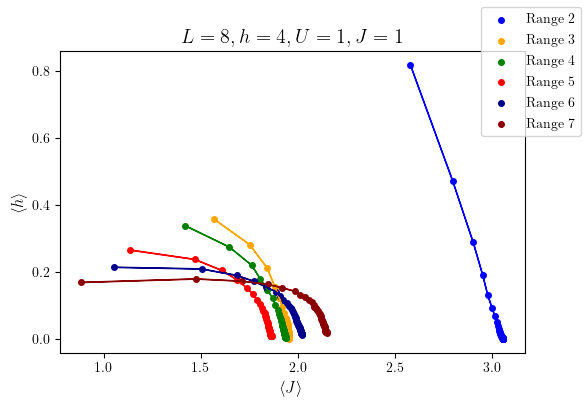

In [46]:
fig, ax = plt.subplots(dpi=100)

colors = ['blue', 'orange', 'green', 'red', 'darkblue', 'darkred']
for r in np.arange(2,L):
    ax.scatter( avg_h_vs_range_deloc[r][1:], avg_J_vs_range_deloc[r][1:], label="Range $%d$"%r, color=colors[r-2] )
    
    # Add arrows to the first few points
    for i in range(1,10):
        delta = [avg_h_vs_range_deloc[r][i+1] - avg_h_vs_range_deloc[r][i], avg_J_vs_range_deloc[r][i+1]-avg_J_vs_range_deloc[r][i]]
        ax.arrow( avg_h_vs_range_deloc[r][i], avg_J_vs_range_deloc[r][i], delta[0], delta[1], color=colors[r-2], length_includes_head=True, head_width=0.002 )

#ax[0].set_ylabel("Average diagonal")
ax.set_title("$L=8,h=4,U=1,J=1$")
ax.set_ylabel("$\\langle h \\rangle$")
ax.set_xlabel("$\\langle J \\rangle$")
fig.legend(fancybox=True)

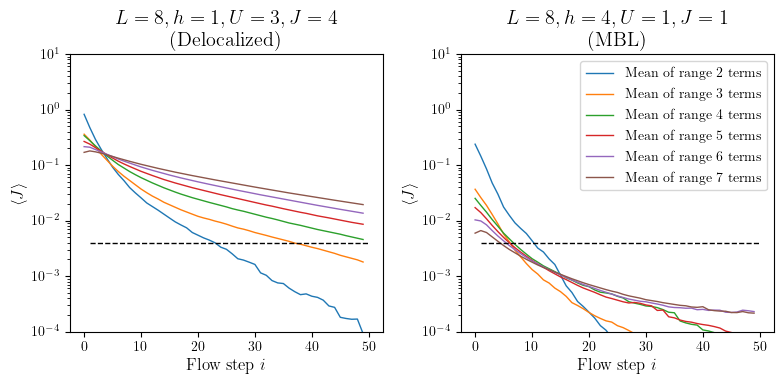

In [36]:
fig, ax = plt.subplots(1,2, dpi=100, figsize=(8,4))

for r in np.arange(2,L):
    ax[0].plot( avg_J_vs_range_deloc[r][1:600], label="Mean of range {0} terms".format(r) )
    ax[1].plot( avg_J_vs_range_MBL[r][1:600], label="Mean of range {0} terms".format(r) )
    
#ax[0].set_ylabel("Average diagonal")
ax[0].plot([1,50], [1/2**8, 1/2**8], '--', c='k')
ax[0].set_ylabel("$\\langle J \\rangle$")
ax[0].set_xlabel("Flow step $i$")
ax[0].set_ylim(1e-4,10)
ax[0].set_yscale('log')

ax[1].plot([1,50], [1/2**8, 1/2**8], '--', c='k')
ax[1].set_ylabel("$\\langle J \\rangle$")
ax[1].set_xlabel("Flow step $i$")
ax[1].set_yscale('log')
ax[1].set_ylim(1e-4,10)
ax[1].legend(fancybox=True)

ax[0].set_title("$L=8,h=1,U=3,J=4$ \n (Delocalized)")
ax[1].set_title("$L=8,h=4,U=1,J=1$ \n (MBL)")

fig.tight_layout()

## Automatic summary plots

In [68]:
def make_summary_plots(L):
    data = np.atleast_2d(np.load("averaged-hJ-L-%d-h-%.1f-U-%.1f-J-%.1f.npy"%(8,1,3,4), allow_pickle=True))[0][0]
    avg_h_vs_range_deloc, avg_J_vs_range_deloc = data['avg_h_vs_range'], data['avg_J_vs_range']
    data = np.atleast_2d(np.load("averaged-hJ-L-%d-h-%.1f-U-%.1f-J-%.1f.npy"%(8,4,1,1), allow_pickle=True))[0][0]
    avg_h_vs_range_MBL, avg_J_vs_range_MBL = data['avg_h_vs_range'], data['avg_J_vs_range']


    fig, ax = plt.subplots(2,2, dpi=100, figsize=(8,8))
    
    colors = ['blue', 'orange', 'green', 'red', 'darkblue', 'darkred']
    for r in np.arange(2,L):
        ax[0,0].scatter( avg_h_vs_range_deloc[r][1:], avg_J_vs_range_deloc[r][1:], label="Range $%d$"%r, color=colors[r-2] )
        ax[0,1].scatter( avg_h_vs_range_MBL[r][1:], avg_J_vs_range_MBL[r][1:], label="Range $%d$"%r, color=colors[r-2] )
    
    # Add arrows to the first few points
    for i in range(1,10):
        delta = [avg_h_vs_range_deloc[r][i+1] - avg_h_vs_range_deloc[r][i], avg_J_vs_range_deloc[r][i+1]-avg_J_vs_range_deloc[r][i]]
        ax[0,0].arrow( avg_h_vs_range_deloc[r][i], avg_J_vs_range_deloc[r][i], delta[0], delta[1], color=colors[r-2], length_includes_head=True, head_width=0.002 )
        delta = [avg_h_vs_range_MBL[r][i+1] - avg_h_vs_range_MBL[r][i], avg_J_vs_range_MBL[r][i+1]-avg_J_vs_range_MBL[r][i]]
        ax[0,0].arrow( avg_h_vs_range_MBL[r][i], avg_J_vs_range_MBL[r][i], delta[0], delta[1], color=colors[r-2], length_includes_head=True, head_width=0.002 )

    #ax[0].set_ylabel("Average diagonal")
    ax[0,0].set_title("$L=%d,h=1,U=3,J=4$ \n (Delocalized)"%L)
    ax[0,1].set_title("$L=%d,h=4,U=1,J=1$ \n (MBL)"%L)
    ax[0,0].set_ylabel("$\\langle h \\rangle$")
    ax[0,0].set_xlabel("$\\langle J \\rangle$")
    ax[0,1].set_xlabel("$\\langle J \\rangle$")
    ax[0,1].legend(fancybox=True)
    

    for r in np.arange(2,L):
        ax[1,0].plot( avg_J_vs_range_deloc[r][1:600], label="Mean of range {0} terms".format(r) )
        ax[1,1].plot( avg_J_vs_range_MBL[r][1:600], label="Mean of range {0} terms".format(r) )

    ax[1,0].plot([1,50], [1/2**L, 1/2**L], '--', c='k')
    ax[1,0].text(2, (1/2**L)/4, "1/2**%d"%L)
    ax[1,0].set_ylabel("$\\langle J \\rangle$")
    ax[1,0].set_xlabel("Flow step $i$")
    ax[1,0].set_ylim(1e-6,10)
    ax[1,0].set_yscale('log')

    ax[1,1].plot([1,50], [1/2**L, 1/2**L], '--', c='k')
    ax[1,1].set_ylabel("$\\langle J \\rangle$")
    ax[1,1].set_xlabel("Flow step $i$")
    ax[1,1].set_yscale('log')
    ax[1,1].set_ylim(1e-6,10)
    ax[1,1].legend(fancybox=True)

    ax[1,0].set_title("$L=%d,h=1,U=3,J=4$ \n (Delocalized)"%L)
    ax[1,1].set_title("$L=%d,h=4,U=1,J=1$ \n (MBL)"%L)

    fig.tight_layout()

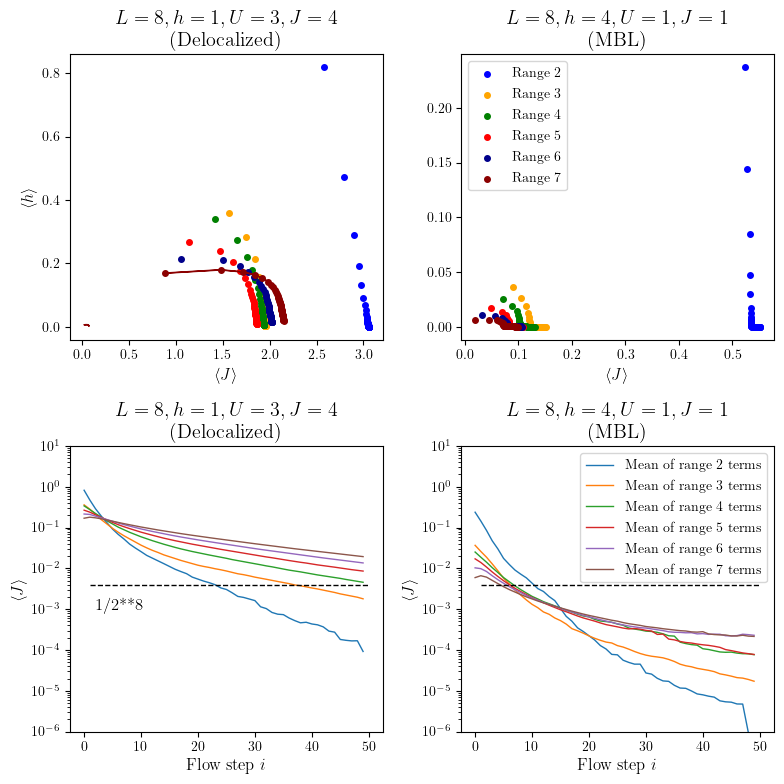

In [72]:
make_summary_plots(8)